In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [129]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report




In [3]:
# Function to do some text prepocessing and simplify the databases
def preprocess_text(text):
    text = text.lower()  
    tokens = word_tokenize(text) 
    tokens = [word for word in tokens if word not in string.punctuation]  
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [8]:
# Importing the sentiment panda dataframes
%cd ..
import data_retriever
from data_retriever import data1, data2

C:\Users\alexh\PycharmProjects\proj_bach
File simple_emotions.txt already exists. Not overwriting.
File simple_sentiments.txt already exists. Not overwriting.
File clean_tweet_emotions.txt already exists. Not overwriting.
File clean_tweet_sentiments.txt already exists. Not overwriting.
                                                Text Sentiment
0  During the period of falling in love, each tim...  Positive
1         When I was involved in a traffic accident.  Negative
2  When I was driving home after  several days of...  Negative
3   When I lost the person who meant the most to me.  Negative
4  The time I knocked a deer down - the sight of ...  Negative
Index(['Text', 'Sentiment'], dtype='object')
                                                   Text Sentiment
0     During the period of falling in love, each tim...  Positive
1            When I was involved in a traffic accident.  Negative
2     When I was driving home after  several days of...  Negative
3      When I lost the per

C:\Users\alexh\miniconda3\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [109]:
# Checking the imports
print(data1.head(), data2.head())

                                                Text Sentiment
0  During the period of falling in love, each tim...  Positive
1         When I was involved in a traffic accident.  Negative
2  When I was driving home after  several days of...  Negative
3   When I lost the person who meant the most to me.  Negative
4  The time I knocked a deer down - the sight of ...  Negative                                                 Text Sentiment
0                                                NaN   neutral
1                     Sage Act upgrade list tommorow  Positive
2  WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  Negative
3  eye  true hazel eyeand brilliant  Regular feat...  Positive
4    ugh babe hugggzzz u  babe naamazed nga ako e...  Positive


In [10]:
# Actually preprocessing the dataframes
nltk.download('punkt')
nltk.download('stopwords')
X_1,y_1, X_2, y_2 =[],[],[],[]
for i in range(len(data1['Text'])):
    X_1.append(preprocess_text(str(data1['Text'][i])))
    y_1.append(data1['Sentiment'][i])
for i in range(len(data2['Text'])):
    X_2.append(preprocess_text(str(data2['Text'][i])))
    y_2.append(data2['Sentiment'][i])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Testing the processed dataframes 
len(X_1),len(y_1),len(X_2),len(y_2)
print(X_1[:5], y_1[:5], X_2[:5], y_2[:5])

['period falling love time met especially met long time', 'involved traffic accident', 'driving home several days hard work motorist ahead driving 50 km/hour refused despite low speeed let overtake', 'lost person meant', "time knocked deer sight animal 's injuries helplessness realization animal badly hurt put animal screamed moment death"] ['Positive', 'Negative', 'Negative', 'Negative', 'Negative'] ['nan', 'sage act upgrade list tommorow', 'way homegirl baby funeral man hate funerals shows blessed', 'eye true hazel eyeand brilliant regular features open countenance complexion oh bloom health pretty height size firm upright figure health merely bloom air head glance hears child picture health gives idea complete picture grownup health loveliness', 'ugh babe hugggzzz u babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang'] ['neutral', 'Positive', 'Negative', 'Positive', 'Positive']


<Axes: >

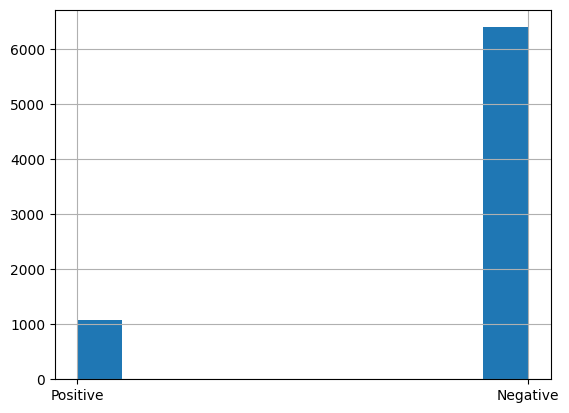

In [12]:
data1['Sentiment'].hist()

<Axes: >

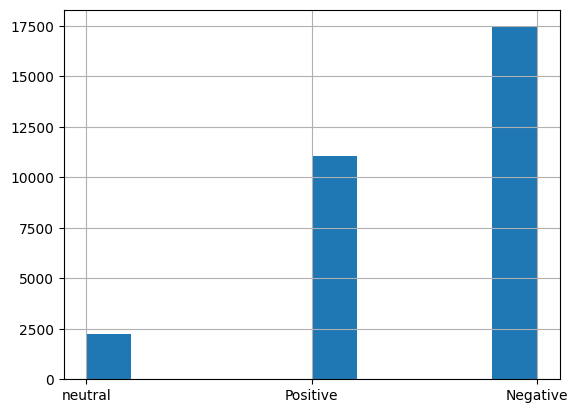

In [13]:
data2['Sentiment'].hist()

In [14]:
data1['Sentiment'].value_counts()

Sentiment
Negative    6396
Positive    1084
Name: count, dtype: int64

In [15]:
data2['Sentiment'].value_counts()


Sentiment
Negative    17431
Positive    11045
neutral      2254
Name: count, dtype: int64

In [16]:
print(data1.head())
print(data2.head())

                                                Text Sentiment
0  During the period of falling in love, each tim...  Positive
1         When I was involved in a traffic accident.  Negative
2  When I was driving home after  several days of...  Negative
3   When I lost the person who meant the most to me.  Negative
4  The time I knocked a deer down - the sight of ...  Negative
                                                Text Sentiment
0                                                NaN   neutral
1                     Sage Act upgrade list tommorow  Positive
2  WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  Negative
3  eye  true hazel eyeand brilliant  Regular feat...  Positive
4    ugh babe hugggzzz u  babe naamazed nga ako e...  Positive


In [140]:
nums_1 = [0 if i=='Negative' else 1 for i in data1['Sentiment']]
nums_2 = [0 if i=='Negative' else 1 if i=='neutral' else 2 for i in data2['Sentiment']]

In [141]:
print(nums_1[:10], nums_2[:10])

[1, 0, 0, 0, 0, 0, 0, 1, 0, 0] [1, 2, 0, 2, 2, 0, 0, 0, 0, 2]


In [142]:
tfidf1 = TfidfVectorizer()
tfidf2 = TfidfVectorizer()
X_1_mod = tfidf1.fit_transform(X_1)
X_2_mod = tfidf2.fit_transform(X_2)

In [143]:
print(X_1_mod)

  (0, 4632)	0.2649121833340404
  (0, 2738)	0.34921593252459837
  (0, 4914)	0.5545060808602135
  (0, 7973)	0.38890528398147745
  (0, 4663)	0.2742101783920608
  (0, 2948)	0.3867188095908672
  (0, 5715)	0.3527078030712056
  (1, 151)	0.49196776085081484
  (1, 8059)	0.6526456771517076
  (1, 4213)	0.5762129314573082
  (2, 5526)	0.2810109885001428
  (2, 4522)	0.19755659383718144
  (2, 7351)	0.3119937294264151
  (2, 4671)	0.22157215042161688
  (2, 2198)	0.21931710024351125
  (2, 6409)	0.1942817892767744
  (2, 3831)	0.20986343553675796
  (2, 4394)	0.26511865196025036
  (2, 86)	0.25757344976706037
  (2, 311)	0.25757344976706037
  (2, 5088)	0.3119937294264151
  (2, 8737)	0.15837029933579047
  (2, 3640)	0.2011829106456576
  (2, 2023)	0.17440682893385873
  (2, 6981)	0.17711333068992705
  :	:
  (7477, 7310)	0.2898243264231469
  (7477, 7370)	0.30339473376192544
  (7477, 2424)	0.21979695646936162
  (7477, 3833)	0.1807094110960439
  (7477, 4886)	0.25065040873560657
  (7477, 5490)	0.23804326773529794
  

In [144]:
print(X_2_mod)

  (0, 17464)	1.0
  (1, 26903)	0.4706265168850852
  (1, 15288)	0.36637296119552987
  (1, 28061)	0.49868305732774154
  (1, 899)	0.3637566095379716
  (1, 22838)	0.5131061023425152
  (2, 3280)	0.32898554922727374
  (2, 23827)	0.3438878194250746
  (2, 10505)	0.46508067403150216
  (2, 11913)	0.23736839458982492
  (2, 15962)	0.23584275228339135
  (2, 10504)	0.33997077495615174
  (2, 2414)	0.27937434765293795
  (2, 12409)	0.44735735520647435
  (2, 28839)	0.22690378341980438
  (3, 15594)	0.1798985987584521
  (3, 11450)	0.173043013480454
  (3, 5544)	0.1258155817607012
  (3, 12848)	0.11392422549240319
  (3, 10915)	0.12103795248242294
  (3, 19689)	0.25232842342842343
  (3, 4814)	0.10678636398035042
  (3, 12023)	0.1644059974810894
  (3, 10929)	0.14274802731933472
  (3, 11975)	0.10410019913730481
  :	:
  (30723, 17416)	0.21502978088577393
  (30724, 990)	0.5993776150774238
  (30724, 27816)	0.6308987674675843
  (30724, 27925)	0.4926593343802415
  (30725, 5969)	0.5269051106552671
  (30725, 18719)	0.526

In [145]:
X_1_train,X_1_test,y_1_train,y_1_test = train_test_split(X_1_mod,nums_1,test_size=0.4,random_state=42)
X_2_train,X_2_test,y_2_train,y_2_test = train_test_split(X_2_mod,nums_2,test_size=0.4,random_state=42)


In [146]:
print(X_1_train)

  (0, 504)	0.4405200879367854
  (0, 3948)	0.4405200879367854
  (0, 6713)	0.39677395309472857
  (0, 514)	0.28879142086475973
  (0, 6632)	0.4074274144311328
  (0, 1898)	0.363681279589076
  (0, 5076)	0.19141574905392145
  (0, 3785)	0.19013913192546514
  (1, 7115)	0.2930820343881719
  (1, 383)	0.3345269297953012
  (1, 1542)	0.4180424555824088
  (1, 5475)	0.2277269473182763
  (1, 2303)	0.2960650756007727
  (1, 8555)	0.18350490698273983
  (1, 361)	0.23656757773481216
  (1, 4406)	0.18726587202312153
  (1, 8617)	0.19870774563040658
  (1, 3293)	0.2518025629732404
  (1, 557)	0.37329634479188495
  (1, 352)	0.19234553739927568
  (1, 5726)	0.16931824226955838
  (1, 4522)	0.2351794182494613
  (2, 6869)	0.314477923496396
  (2, 5430)	0.23749448598012035
  (2, 3810)	0.2842726085410663
  :	:
  (4484, 5635)	0.28912881791858047
  (4484, 672)	0.2851593453240929
  (4484, 3908)	0.4048763459640749
  (4484, 1470)	0.28004925327441754
  (4484, 3293)	0.1952415641151207
  (4485, 3249)	0.5413068815292894
  (4485, 2

In [147]:
print(y_2_test)

[0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 

In [159]:
lr1 = LogisticRegression()
lr2 = LogisticRegression()
svm1 = SVC()
svm2 = SVC()
mnb1 = MultinomialNB()
mnb2 = MultinomialNB()

In [174]:
lr1.fit(X_1_train,y_1_train)
# Problem, the Logistic Regression class is a classifier and not a real regression, thus it only takes y with values 0 or 1, thus our label 2 won't be taken into account, however Scikit learn uses OVR by default for >2 classes
lr2.fit(X_2_train,y_2_train)

LogisticRegression()

In [180]:
print("Test Accuracy Dataset 1: ",accuracy_score(lr1.predict(X_1_test),y_1_test),"\t VS \t Train Accuracy Dataset 1: ", accuracy_score(lr1.predict(X_1_train),y_1_train))
print("Test Accuracy Dataset 2: ",accuracy_score(lr2.predict(X_2_test),y_2_test), "\t VS \t Train Accuracy Dataset 2: ", accuracy_score(lr2.predict(X_2_train),y_2_train)
)


Test Accuracy Dataset 1:  0.8826871657754011 	 VS 	 Train Accuracy Dataset 1:  0.9073083778966132
Test Accuracy Dataset 2:  0.775382362512203 	 VS 	 Train Accuracy Dataset 2:  0.8778609393643563


In [185]:
print("Testing results on unseen datasets : ")
print("Test Accuracy DS1 with DS2 labels: ",accuracy_score(lr1.predict(X_2_test[:8833]),y_2_test[:8833]))
print("\t VS \t Train Accuracy Dataset 1: ", accuracy_score(lr1.predict(X_1_train),y_1_train))
print("Test Accuracy Dataset 2: ",accuracy_score(lr2.predict(X_2_test),y_2_test), "\t VS \t Train Accuracy Dataset 2: ", accuracy_score(lr2.predict(X_2_train),y_2_train)
)

Testing results on unseen datasets : 


ValueError: X has 30030 features, but LogisticRegression is expecting 8834 features as input.

In [ ]:
svm1.fit(X_1_train,y_1_train)
svm2.fit(X_2_train,y_2_train)

SVC()

In [166]:
accuracy_score(svm1.predict(X_1_test),y_1_test),accuracy_score(svm1.predict(X_1_train),y_1_train)

(0.8937165775401069, 0.9792780748663101)

In [167]:
accuracy_score(svm2.predict(X_2_test),y_2_test),accuracy_score(svm2.predict(X_2_train),y_2_train)


(0.7841685649202733, 0.9578587699316629)

In [168]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_1_train,y_1_train)

DecisionTreeClassifier()

In [169]:
dt2 = DecisionTreeClassifier()
dt2.fit(X_2_train,y_2_train)

DecisionTreeClassifier()

In [170]:
accuracy_score(dt1.predict(X_1_test),y_1_test),accuracy_score(dt1.predict(X_1_train),y_1_train)

(0.8619652406417112, 0.999554367201426)

In [171]:
accuracy_score(dt2.predict(X_2_test),y_2_test),accuracy_score(dt2.predict(X_2_train),y_2_train)


(0.700130165961601, 0.995335719709296)

In [172]:
rf1 = RandomForestClassifier()
rf1.fit(X_1_train,y_1_train)

RandomForestClassifier()

In [173]:
rf2 = RandomForestClassifier()
rf2.fit(X_2_train,y_2_train)

RandomForestClassifier()

In [70]:
accuracy_score(rf1.predict(X_1_test),y_1_test),accuracy_score(rf1.predict(X_1_train),y_1_train)

(0.8943850267379679, 0.9993315508021391)

In [106]:
accuracy_score(rf2.predict(X_2_test),y_2_test),accuracy_score(rf2.predict(X_2_train),y_2_train)


(0.7683045883501465, 0.995335719709296)

In [107]:
print(classification_report(rf1.predict(X_1_train),y_1_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3859
           1       1.00      1.00      1.00       629

    accuracy                           1.00      4488
   macro avg       1.00      1.00      1.00      4488
weighted avg       1.00      1.00      1.00      4488



In [108]:
print(classification_report(rf2.predict(X_2_test),y_2_test))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      7405
           1       0.67      0.64      0.66       953
           2       0.67      0.75      0.71      3934

    accuracy                           0.77     12292
   macro avg       0.73      0.73      0.73     12292
weighted avg       0.77      0.77      0.77     12292

